In [ ]:
# From: https://www.kaggle.com/datasets/naddamuhhamed/sleepy-driver-eeg-brainwave-data/data
# Download data as zip: "acquiredDataset.csv"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving acquiredDataset.csv to acquiredDataset (1).csv


In [ ]:
data = pd.read_csv("acquiredDataset.csv")

In [ ]:
data.head()

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
0,26,34,960462,277180,26575,27356,26575,13056,9126,2683,0
1,29,54,39145,28225,20172,39551,20172,9933,5237,4750,0
2,40,48,75410,43144,8601,13564,8601,11663,2515,3251,0
3,66,47,16057,41211,2534,34254,2534,27663,11396,2825,0
4,81,67,10304,47239,33158,47349,33158,16328,5298,5471,0


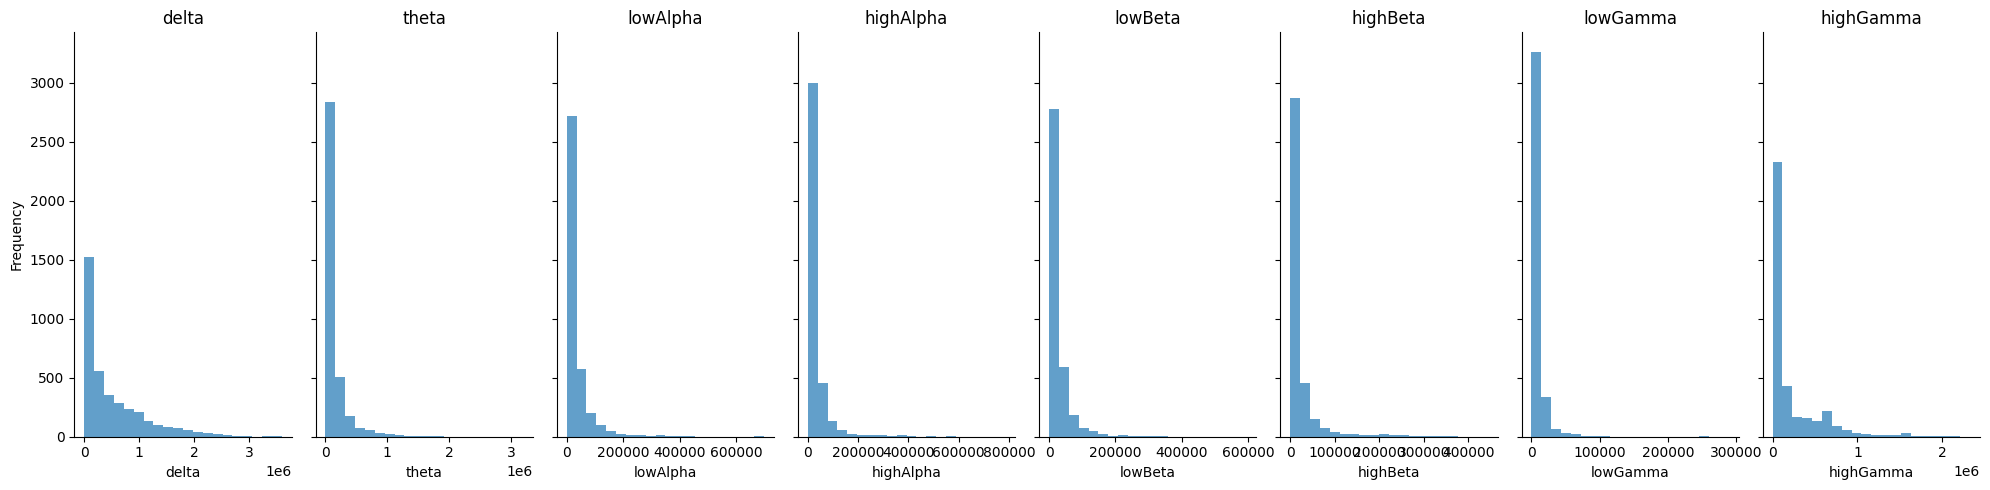

In [ ]:
# @title EEG waveform frequency
columns = ['delta', 'theta', 'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta', 'lowGamma', 'highGamma']

# Create subplots
fig, axes = plt.subplots(1, len(columns), figsize=(20, 5), sharey=True)

# Plot each column
for ax, col in zip(axes, columns):
    data[col].plot(kind='hist', bins=20, ax=ax, title=col, alpha=0.7)
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

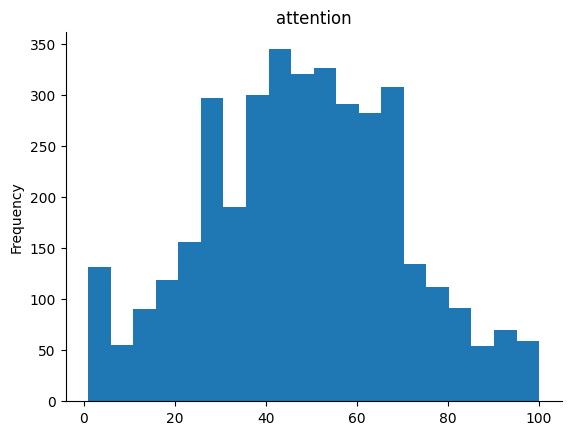

In [ ]:
# @title attention

from matplotlib import pyplot as plt
data['attention'].plot(kind='hist', bins=20, title='attention')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
eeg = data[['delta', 'theta', 'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta', 'lowGamma', 'highGamma']]
target = data['attention']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(eeg, target, test_size=0.2, random_state=42)

In [ ]:
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_hat = regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print("Mean Squared Error:", mse)


Mean Squared Error: 302.9313904953146
R² Score: 0.3521985070042266
